In [ ]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [3]:
data_frame = pd.read_csv("Salestrain.csv")
data_frame = data_frame['data'].values
data_frame.shape

(96,)

In [4]:
model = auto_arima(data_frame, seasonal = True, m = 12, trace = False)

In [5]:
print(model.order)

(1, 1, 0)


In [8]:
model = ARIMA(data_frame, order = (1, 1, 0))
model_fit = model.fit()

In [9]:
residuals = model_fit.resid

In [10]:
anomalies = np.where(np.abs(residuals) > 2 * np.std(residuals))[0]

In [11]:
anomalies

array([ 0, 62, 83, 89])

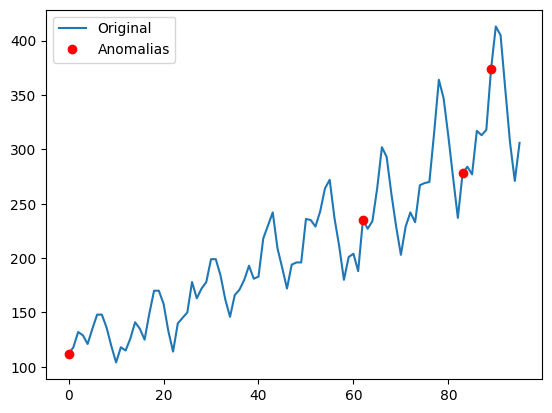

In [12]:
plt.plot(data_frame, label = "Original")
plt.plot(anomalies, data_frame[anomalies], "ro", markersize = 6, label = "Anomalias")
plt.legend()
plt.show()